# lifelines

*lifelines* propose des outils pour l'assurance-vie et des graphes dédiés construit avec [matplotlib](http://matplotlib.org/).

[documentation](http://lifelines.readthedocs.io/en/latest/) [source](https://github.com/CamDavidsonPilon/lifelines) [installation](https://pypi.python.org/pypi/lifelinesl) [tutorial](http://lifelines.readthedocs.io/en/latest/Examples.html) 

In [12]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

In [1]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## exemple

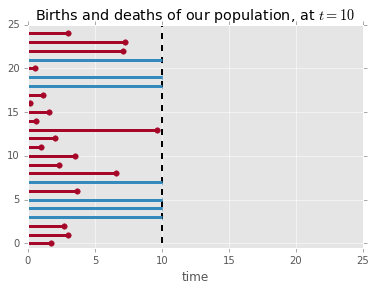

Observed lifetimes at time 10:
 [  3.02619133   7.24435508   7.10589565  10.           0.55006701  10.          10.
   1.11346056   0.17678117   1.55950577   0.62470689   9.67005718
   2.04221597   0.96941741   3.54969145   2.32096977   6.58070782  10.
   3.63641235  10.          10.          10.           2.69480948
   3.00687745   1.7417124 ]


In [17]:
from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential
from numpy import array, minimum
import matplotlib.pyplot as plt

N = 25
current_time = 10
actual_lifetimes = array([[exponential(12), exponential(2)][uniform()<0.5] for i in range(N)])
observed_lifetimes = minimum(actual_lifetimes,current_time)
observed = actual_lifetimes < current_time

plt.xlim(0,25)
plt.vlines(10,0,30,lw=2, linestyles="--")
plt.xlabel('time')
plt.title('Births and deaths of our population, at $t=10$')
plot_lifetimes(observed_lifetimes, event_observed=observed)
print("Observed lifetimes at time %d:\n"%(current_time), observed_lifetimes)

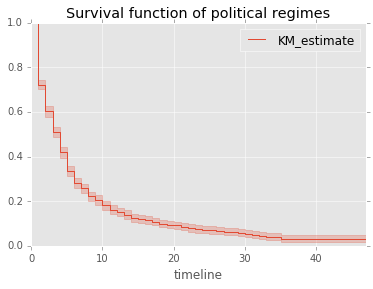

In [18]:
import lifelines
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

data = lifelines.datasets.load_dd()
T = data["duration"]
C = data["observed"]
kmf.fit(T, event_observed=C )

kmf.plot()
plt.title('Survival function of political regimes')